In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

london_devices_loc = 'datasets/user_devices/london_user_device.csv'
birmingham_devices_loc = 'datasets/user_devices/birmingham_user_device.csv'
liverpool_devices_loc = 'datasets/user_devices/liverpool_user_device.csv'

london_userperf_loc = 'datasets/012020/userperf_ldn_2020_jan.csv'
birmingham_userperf_loc = 'datasets/012020/userperf_birm_2020_jan.csv'
liverpool_userperf_loc = 'datasets/012020/userperf_lpool_2020_jan.csv'

# rename 'decil' column to be inline with other notebooks
london_devices_pd = pd.read_csv(london_devices_loc, index_col=False).rename(columns={'decile': 'IMDDecil'})
birmingham_devices_pd = pd.read_csv(birmingham_devices_loc, index_col=False).rename(columns={'decile': 'IMDDecil'})
liverpool_devices_pd = pd.read_csv(liverpool_devices_loc, index_col=False).rename(columns={'decile': 'IMDDecil'})

london_userperf_pd = pd.read_csv(london_userperf_loc, index_col=False)
birmingham_userperf_pd = pd.read_csv(birmingham_userperf_loc, index_col=False)
liverpool_userperf_pd = pd.read_csv(liverpool_userperf_loc, index_col=False)

# 1. Preprocessing

## 1.1 Duplicate device_id entries 
sort the dataset on [deviceI_id, number of days] and keep device with max(number of days)

In [2]:
print('London : fraction of device_ids with multiple entries: ' + str(london_devices_pd.device_id.duplicated().sum()/london_devices_pd.device_id.nunique()))
print('Birmingham : fraction of device_ids with multiple entries: ' + str(birmingham_devices_pd.device_id.duplicated().sum()/birmingham_devices_pd.device_id.nunique()))
print('Liverpool : fraction of device_ids with multiple entries: ' + str(liverpool_devices_pd.device_id.duplicated().sum()/liverpool_devices_pd.device_id.nunique()))

London : fraction of device_ids with multiple entries: 0.0538089983638139
Birmingham : fraction of device_ids with multiple entries: 0.05816874773858369
Liverpool : fraction of device_ids with multiple entries: 0.05129884854745648


In [3]:
london_devices_pd = london_devices_pd.sort_values(['device_id','number_days']).drop_duplicates('device_id', keep='last')
birmingham_devices_pd = birmingham_devices_pd.sort_values(['device_id','number_days']).drop_duplicates('device_id', keep='last')
liverpool_devices_pd = liverpool_devices_pd.sort_values(['device_id','number_days']).drop_duplicates('device_id', keep='last')

## 1.2 nan values in categorical(string) columns


In [4]:
print('London : fraction of device_ids with NA tacClassification: ' + str(london_devices_pd.tacClassification.isna().sum()/len(london_devices_pd)))
print('London : fraction of device_ids with NA tacDeviceType: ' + str(london_devices_pd.tacDeviceType.isna().sum()/len(london_devices_pd)))
print('London : fraction of device_ids with NA tacOS: ' + str(london_devices_pd.tacOS.isna().sum()/len(london_devices_pd)))
print('Birmingham : fraction of device_ids with NA tacClassification: ' + str(birmingham_devices_pd.tacClassification.isna().sum()/len(birmingham_devices_pd)))
print('Birmingham : fraction of device_ids with NA tacDeviceType: ' + str(birmingham_devices_pd.tacDeviceType.isna().sum()/len(birmingham_devices_pd)))
print('Birmingham : fraction of device_ids with NA tacOS: ' + str(birmingham_devices_pd.tacOS.isna().sum()/len(birmingham_devices_pd)))
print('Liverpool : fraction of device_ids with NA tacClassification: ' + str(liverpool_devices_pd.tacClassification.isna().sum()/len(liverpool_devices_pd)))
print('Liverpool : fraction of device_ids with NA tacDeviceType: ' + str(liverpool_devices_pd.tacDeviceType.isna().sum()/len(liverpool_devices_pd)))
print('Liverpool : fraction of device_ids with NA tacOS: ' + str(liverpool_devices_pd.tacOS.isna().sum()/len(liverpool_devices_pd)))

London : fraction of device_ids with NA tacClassification: 0.00024369606523632332
London : fraction of device_ids with NA tacDeviceType: 0.00024369606523632332
London : fraction of device_ids with NA tacOS: 0.00024369606523632332
Birmingham : fraction of device_ids with NA tacClassification: 0.0005086053290915422
Birmingham : fraction of device_ids with NA tacDeviceType: 0.0005086053290915422
Birmingham : fraction of device_ids with NA tacOS: 0.0005086053290915422
Liverpool : fraction of device_ids with NA tacClassification: 0.0002456600065509335
Liverpool : fraction of device_ids with NA tacDeviceType: 0.0002456600065509335
Liverpool : fraction of device_ids with NA tacOS: 0.0002456600065509335


In [5]:
london_devices_pd.fillna('NA', inplace=True)
birmingham_devices_pd.fillna('NA', inplace=True)
liverpool_devices_pd.fillna('NA', inplace=True)

# 2. Analysis

In [78]:
# in case some city has unique or missing class
tacClassification_classes = np.unique(np.concatenate([london_devices_pd.tacClassification.unique(), birmingham_devices_pd.tacClassification.unique(), liverpool_devices_pd.tacClassification.unique()]))
tacDeviceType_classes = np.unique(np.concatenate([london_devices_pd.tacDeviceType.unique(), birmingham_devices_pd.tacDeviceType.unique(), liverpool_devices_pd.tacDeviceType.unique()]))
tacOS_classes = np.unique(np.concatenate([london_devices_pd.tacOS.unique(), birmingham_devices_pd.tacOS.unique(), liverpool_devices_pd.tacOS.unique()]))
print('tacClassification classes:\n' + str(tacClassification_classes))
print('tacDeviceType classes:\n' + str(tacDeviceType_classes))
print('tacOS classes:\n' + str(tacOS_classes))

tacClassification classes:
['NA' 'feat' 'm2m' 'smart']
tacDeviceType classes:
['NA' 'connected computer' 'dongle' 'handheld' 'iot device'
 'mobile phone/feature phone' 'modem' 'module' 'portable(include pda)'
 'smartphone' 'tablet' 'vehicle' 'wearable' 'wlan router']
tacOS classes:
['3g smart phone' 'NA' 'amss' 'android' 'bar phone' 'blackberry' 'embeded'
 'embeded sw' 'firefox' 'firefox,not known' 'ios' 'linux' 'm' 'mac os'
 'mocro' 'mtk' 'not known' 'not known,symbian' 'not known,tizen' 'nucleus'
 'other' 'proprietary' 'proprietary os' 'qnx' 'qsc6270' 'qualcomm'
 'qualcomm qsc6270 platform' 'rda1131' 'rex' 'rtk' 's30' 'sailfish'
 'spreadtrum' 'spreadtrum 6531' 'symbian' 'threadx' 'tizen' 'ubuntu'
 'unknown' 'windows' 'yunos (aliyun)' 'zhanxun sc6531da']


## 2.1 Analysis of tac classes
### 2.1.1 Fractions of tac classes

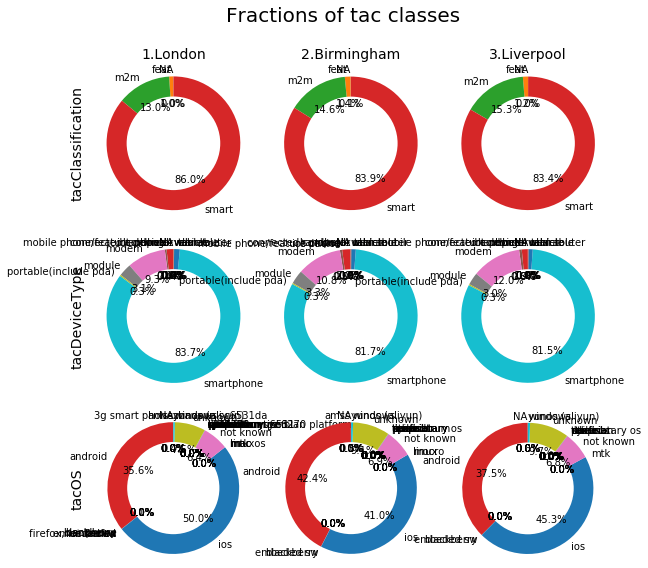

In [136]:
fig, ax = plt.subplots(3, 3, figsize=(9, 9), facecolor='w', edgecolor='k')
fig.suptitle('Fractions of tac classes', size=20 )

def applyPlotStyle(ax):
    #ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    #ax.set_ylim([0.3,1.05])
    ax.set_xlabel('')
    ax.set_ylabel('')
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(centre_circle)
    ax.axis('equal')
    
london_devices_pd.tacClassification.value_counts(normalize=True).reindex(tacClassification_classes, fill_value=0).plot.pie(ax=ax[0,0], autopct='%1.1f%%', startangle=90)
london_devices_pd.tacDeviceType.value_counts(normalize=True).reindex(tacDeviceType_classes, fill_value=0).plot.pie(ax=ax[1,0], autopct='%1.1f%%', startangle=90)
london_devices_pd.tacOS.value_counts(normalize=True).reindex(tacOS_classes, fill_value=0).plot.pie(ax=ax[2,0], autopct='%1.1f%%', startangle=90)
applyPlotStyle(ax[0,0])
applyPlotStyle(ax[1,0])
applyPlotStyle(ax[2,0])
ax[0,0].set_title('1.London', y=1.05, size=14)
ax[0,0].set_ylabel('tacClassification', labelpad=15, size=14)
ax[1,0].set_ylabel('tacDeviceType', labelpad=15, size=14)
ax[2,0].set_ylabel('tacOS', labelpad=15, size=14)

birmingham_devices_pd.tacClassification.value_counts(normalize=True).reindex(tacClassification_classes, fill_value=0).plot.pie(ax=ax[0,1], autopct='%1.1f%%', startangle=90)
birmingham_devices_pd.tacDeviceType.value_counts(normalize=True).reindex(tacDeviceType_classes, fill_value=0).plot.pie(ax=ax[1,1], autopct='%1.1f%%', startangle=90)
birmingham_devices_pd.tacOS.value_counts(normalize=True).reindex(tacOS_classes, fill_value=0).plot.pie(ax=ax[2,1], autopct='%1.1f%%', startangle=90)
applyPlotStyle(ax[0,1])
applyPlotStyle(ax[1,1])
applyPlotStyle(ax[2,1])
ax[0,1].set_title('2.Birmingham', y=1.05, size=14)

liverpool_devices_pd.tacClassification.value_counts(normalize=True).reindex(tacClassification_classes, fill_value=0).plot.pie(ax=ax[0,2], autopct='%1.1f%%', startangle=90)
liverpool_devices_pd.tacDeviceType.value_counts(normalize=True).reindex(tacDeviceType_classes, fill_value=0).plot.pie(ax=ax[1,2], autopct='%1.1f%%', startangle=90)
liverpool_devices_pd.tacOS.value_counts(normalize=True).reindex(tacOS_classes, fill_value=0).plot.pie(ax=ax[2,2], autopct='%1.1f%%', startangle=90)
applyPlotStyle(ax[0,2])
applyPlotStyle(ax[1,2])
applyPlotStyle(ax[2,2])
ax[0,2].set_title('3.Liverpool', y=1.05, size=14);

### 2.1.2 Hierarchy exploration

In [84]:
print('tacDeviceType == Smart, unique values :')
print(london_devices_pd[london_devices_pd['tacClassification']=='smart']['tacDeviceType'].unique())
print('tacDeviceType == m2m, unique values :')
print(london_devices_pd[london_devices_pd['tacClassification']=='m2m']['tacDeviceType'].unique())
print('tacDeviceType == feat, unique values :')
print(london_devices_pd[london_devices_pd['tacClassification']=='feat']['tacDeviceType'].unique())
#print(london_devices_pd[london_devices_pd['tacClassification']=='feat']['tacDeviceType'].value_counts())

tacDeviceType == Smart, unique values :
['smartphone' 'handheld' 'tablet' 'mobile phone/feature phone' 'wearable'
 'portable(include pda)' 'connected computer' 'iot device']
tacDeviceType == m2m, unique values :
['modem' 'module' 'dongle' 'portable(include pda)' 'handheld' 'vehicle'
 'wlan router' 'iot device' 'wearable' 'mobile phone/feature phone'
 'smartphone' 'tablet']
tacDeviceType == feat, unique values :
['mobile phone/feature phone' 'portable(include pda)' 'handheld' 'module'
 'smartphone' 'wearable']


### 2.1.3 TOP DeviceTypes per LSOA IMD decile

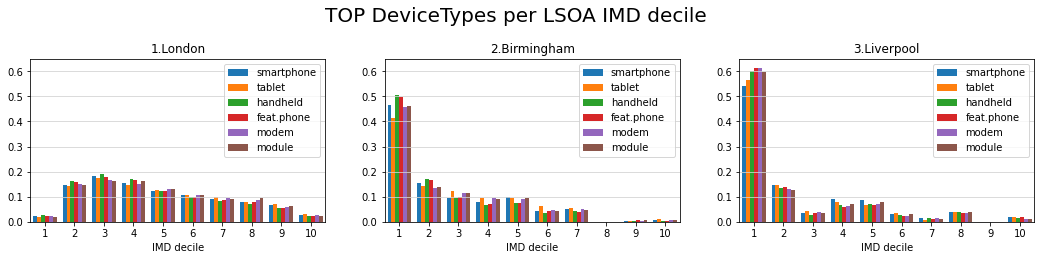

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('TOP DeviceTypes per LSOA IMD decile', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.65])
    ax.set_xlabel('IMD decile')
    ax.set_xlim([0.5,10.5])
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax.legend()
    
ax[0].hist([london_devices_pd[london_devices_pd.tacDeviceType=='smartphone'].IMDDecil,\
            london_devices_pd[london_devices_pd.tacDeviceType=='tablet'].IMDDecil,\
            london_devices_pd[london_devices_pd.tacDeviceType=='handheld'].IMDDecil,\
            london_devices_pd[london_devices_pd.tacDeviceType=='mobile phone/feature phone'].IMDDecil,\
            london_devices_pd[london_devices_pd.tacDeviceType=='modem'].IMDDecil,\
            london_devices_pd[london_devices_pd.tacDeviceType=='module'].IMDDecil],\
            bins=np.arange(12)-0.5, density=True, label=['smartphone', 'tablet', 'handheld', 'feat.phone','modem', 'module'])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

ax[1].hist([birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='smartphone'].IMDDecil,\
            birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='tablet'].IMDDecil,\
            birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='handheld'].IMDDecil,\
            birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='mobile phone/feature phone'].IMDDecil,\
            birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='modem'].IMDDecil,\
            birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='module'].IMDDecil],\
            bins=np.arange(12)-0.5, density=True, label=['smartphone', 'tablet', 'handheld', 'feat.phone','modem', 'module'])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

ax[2].hist([liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='smartphone'].IMDDecil,\
            liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='tablet'].IMDDecil,\
            liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='handheld'].IMDDecil,\
            liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='mobile phone/feature phone'].IMDDecil,\
            liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='modem'].IMDDecil,\
            liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='module'].IMDDecil],\
            bins=np.arange(12)-0.5, density=True, label=['smartphone', 'tablet', 'handheld', 'feat.phone','modem', 'module'])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

### 2.1.4 IOS vs Android per LSOA IMD decile

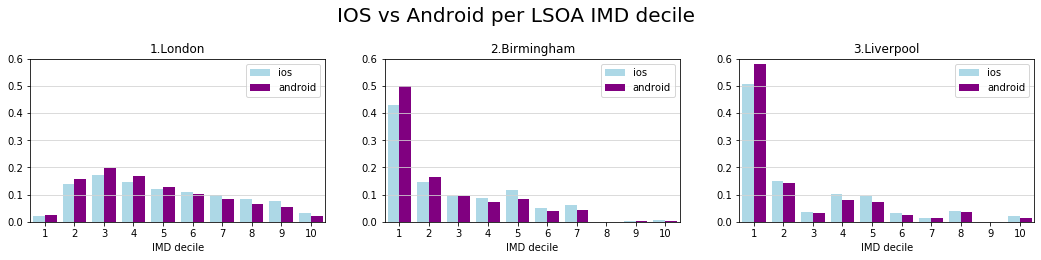

In [191]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('IOS vs Android per LSOA IMD decile', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.6])
    ax.set_xlabel('IMD decile')
    ax.set_xlim([0.5,10.5])
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax.legend()
    
ax[0].hist([london_devices_pd[london_devices_pd.tacOS=='ios'].decile,london_devices_pd[london_devices_pd.tacOS=='android'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['ios', 'android'])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

ax[1].hist([birmingham_devices_pd[birmingham_devices_pd.tacOS=='ios'].decile,birmingham_devices_pd[birmingham_devices_pd.tacOS=='android'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['ios', 'android'])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

ax[2].hist([liverpool_devices_pd[liverpool_devices_pd.tacOS=='ios'].decile,liverpool_devices_pd[liverpool_devices_pd.tacOS=='android'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['ios', 'android'])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

## 2.2 Fairness of received service depending on smartphone model

### Number of smartphone manufacturers before merging with UserPerf data

In [6]:
print('London : number of smartphone models : ' + str(london_devices_pd[london_devices_pd['tacDeviceType'] == 'smartphone']['tacModelName'].nunique()))
print('Birmingham : number of smartphone models : ' + str(birmingham_devices_pd[birmingham_devices_pd['tacDeviceType'] == 'smartphone']['tacModelName'].nunique()))
print('Liverpool : number of smartphone models : ' + str(liverpool_devices_pd[liverpool_devices_pd['tacDeviceType'] == 'smartphone']['tacModelName'].nunique()))
print()
print('London : number of smartphone manufacturers : ' + str(london_devices_pd[london_devices_pd['tacDeviceType'] == 'smartphone']['tacManufacturer'].nunique()))
print('Birmingham : number of smartphone manufacturers : ' + str(birmingham_devices_pd[birmingham_devices_pd['tacDeviceType'] == 'smartphone']['tacManufacturer'].nunique()))
print('Liverpool : number of smartphone manufacturers : ' + str(liverpool_devices_pd[liverpool_devices_pd['tacDeviceType'] == 'smartphone']['tacManufacturer'].nunique()))

London : number of smartphone models : 5592
Birmingham : number of smartphone models : 2797
Liverpool : number of smartphone models : 1929

London : number of smartphone manufacturers : 357
Birmingham : number of smartphone manufacturers : 184
Liverpool : number of smartphone manufacturers : 114


### Number of unique device_ids in UserPerf vs Smarthones device_ids in "UserDevice" datasets

In [7]:
london_devices_mnfs = london_devices_pd[london_devices_pd['tacDeviceType'] == 'smartphone'][['device_id','tacManufacturer','tacModelName','IMDDecil']].copy()
birmingham_devices_mnfs = birmingham_devices_pd[birmingham_devices_pd['tacDeviceType'] == 'smartphone'][['device_id','tacManufacturer','tacModelName','IMDDecil']].copy()
liverpool_devices_mnfs = liverpool_devices_pd[liverpool_devices_pd['tacDeviceType'] == 'smartphone'][['device_id','tacManufacturer','tacModelName','IMDDecil']].copy()

In [8]:
print('London : UserPerf / UserDevice count : ' + str(london_userperf_pd['device_id'].nunique()) + ' / ' + str(london_devices_mnfs['device_id'].nunique()))
print('Birmingham : UserPerf / UserDevice count : ' + str(birmingham_userperf_pd['device_id'].nunique()) + ' / ' + str(birmingham_devices_mnfs['device_id'].nunique()))
print('Liverpool : UserPerf / UserDevice count : ' + str(liverpool_userperf_pd['device_id'].nunique()) + ' / ' + str(liverpool_devices_mnfs['device_id'].nunique()))

London : UserPerf / UserDevice count : 1742563 / 2029935
Birmingham : UserPerf / UserDevice count : 202089 / 239452
Liverpool : UserPerf / UserDevice count : 119739 / 129353


### Merge datasets

In [9]:
london_userperf_pd = pd.merge(london_userperf_pd, london_devices_mnfs, on='device_id', how='inner')
birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_devices_mnfs, on='device_id', how='inner')
liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_devices_mnfs, on='device_id', how='inner')

### Number of smartphone manufacturers after merging with UserPerf data

In [10]:
print('London : number of smartphone manufacturers : ' + str(london_userperf_pd['tacManufacturer'].nunique()))
print('Birmingham : number of smartphone manufacturers : ' + str(birmingham_userperf_pd['tacManufacturer'].nunique()))
print('Liverpool : number of smartphone manufacturers : ' + str(liverpool_userperf_pd['tacManufacturer'].nunique()))

London : number of smartphone manufacturers : 270
Birmingham : number of smartphone manufacturers : 144
Liverpool : number of smartphone manufacturers : 100


### 2.2.1. Manufacturers

#### 2.2.1.1 Manufacturers distribution per LSOA IMD decile

In [179]:
london_manufacturer_counts = london_userperf_pd['tacManufacturer'].value_counts(normalize = True)
london_ordered = [london_manufacturer_counts[0]]
for i in range(1,len(london_manufacturer_counts)):
    london_ordered.append(london_manufacturer_counts[i] + london_ordered[i-1])
    
birmingham_manufacturer_counts = birmingham_userperf_pd['tacManufacturer'].value_counts(normalize = True)
birmingham_ordered = [birmingham_manufacturer_counts[0]]
for i in range(1,len(birmingham_manufacturer_counts)):
    birmingham_ordered.append(birmingham_manufacturer_counts[i] + birmingham_ordered[i-1])
    
liverpool_manufacturer_counts = liverpool_userperf_pd['tacManufacturer'].value_counts(normalize = True)
liverpool_ordered = [liverpool_manufacturer_counts[0]]
for i in range(1,len(liverpool_manufacturer_counts)):
    liverpool_ordered.append(liverpool_manufacturer_counts[i] + liverpool_ordered[i-1])

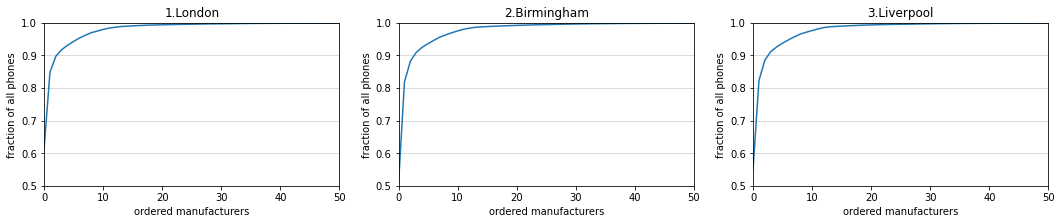

In [192]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
#fig.suptitle('Modem vs Smartphone per LSOA IMD decile', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0.5,1])
    ax.set_xlim([0,50])
    ax.set_xlabel('ordered manufacturers')
    ax.set_ylabel('fraction of all phones')
    
ax[0].plot(london_ordered)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

ax[1].plot(birmingham_ordered)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

ax[2].plot(liverpool_ordered)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

In [181]:
# filter manufacturers with 99% of all devices
london_last_manufacturer = np.where(np.array(london_ordered) > 0.99)[0][0]
birmingham_last_manufacturer = np.where(np.array(birmingham_ordered) > 0.99)[0][0]
liverpool_last_manufacturer = np.where(np.array(liverpool_ordered) > 0.99)[0][0]

london_p99_manufacturers = london_manufacturer_counts.index.values[:london_last_manufacturer]
birmingham_p99_manufacturers = birmingham_manufacturer_counts.index.values[:birmingham_last_manufacturer]
liverpool_p99_manufacturers = liverpool_manufacturer_counts.index.values[:liverpool_last_manufacturer]

In [182]:
# prepare the dataset for plotting
london_userperf_pd = london_userperf_pd[london_userperf_pd['tacManufacturer'].isin(london_p99_manufacturers)]
birmingham_userperf_pd = birmingham_userperf_pd[birmingham_userperf_pd['tacManufacturer'].isin(birmingham_p99_manufacturers)]
liverpool_userperf_pd = liverpool_userperf_pd[liverpool_userperf_pd['tacManufacturer'].isin(liverpool_p99_manufacturers)]

london_userperf_pd['IMDDecil'] = london_userperf_pd['IMDDecil'].astype(int)
birmingham_userperf_pd['IMDDecil'] = birmingham_userperf_pd['IMDDecil'].astype(int)
liverpool_userperf_pd['IMDDecil'] = liverpool_userperf_pd['IMDDecil'].astype(int)

london = london_userperf_pd.pivot_table(index='tacManufacturer', columns='IMDDecil', aggfunc='size', fill_value=0)
london = london/london.sum()
birmingham = birmingham_userperf_pd.pivot_table(index='tacManufacturer', columns='IMDDecil', aggfunc='size', fill_value=0)
birmingham = birmingham/birmingham.sum()
liverpool = liverpool_userperf_pd.pivot_table(index='tacManufacturer', columns='IMDDecil', aggfunc='size', fill_value=0)
liverpool = liverpool/liverpool.sum()

#### 2.2.1.2 Manufacturer distribution per LSOA IMD

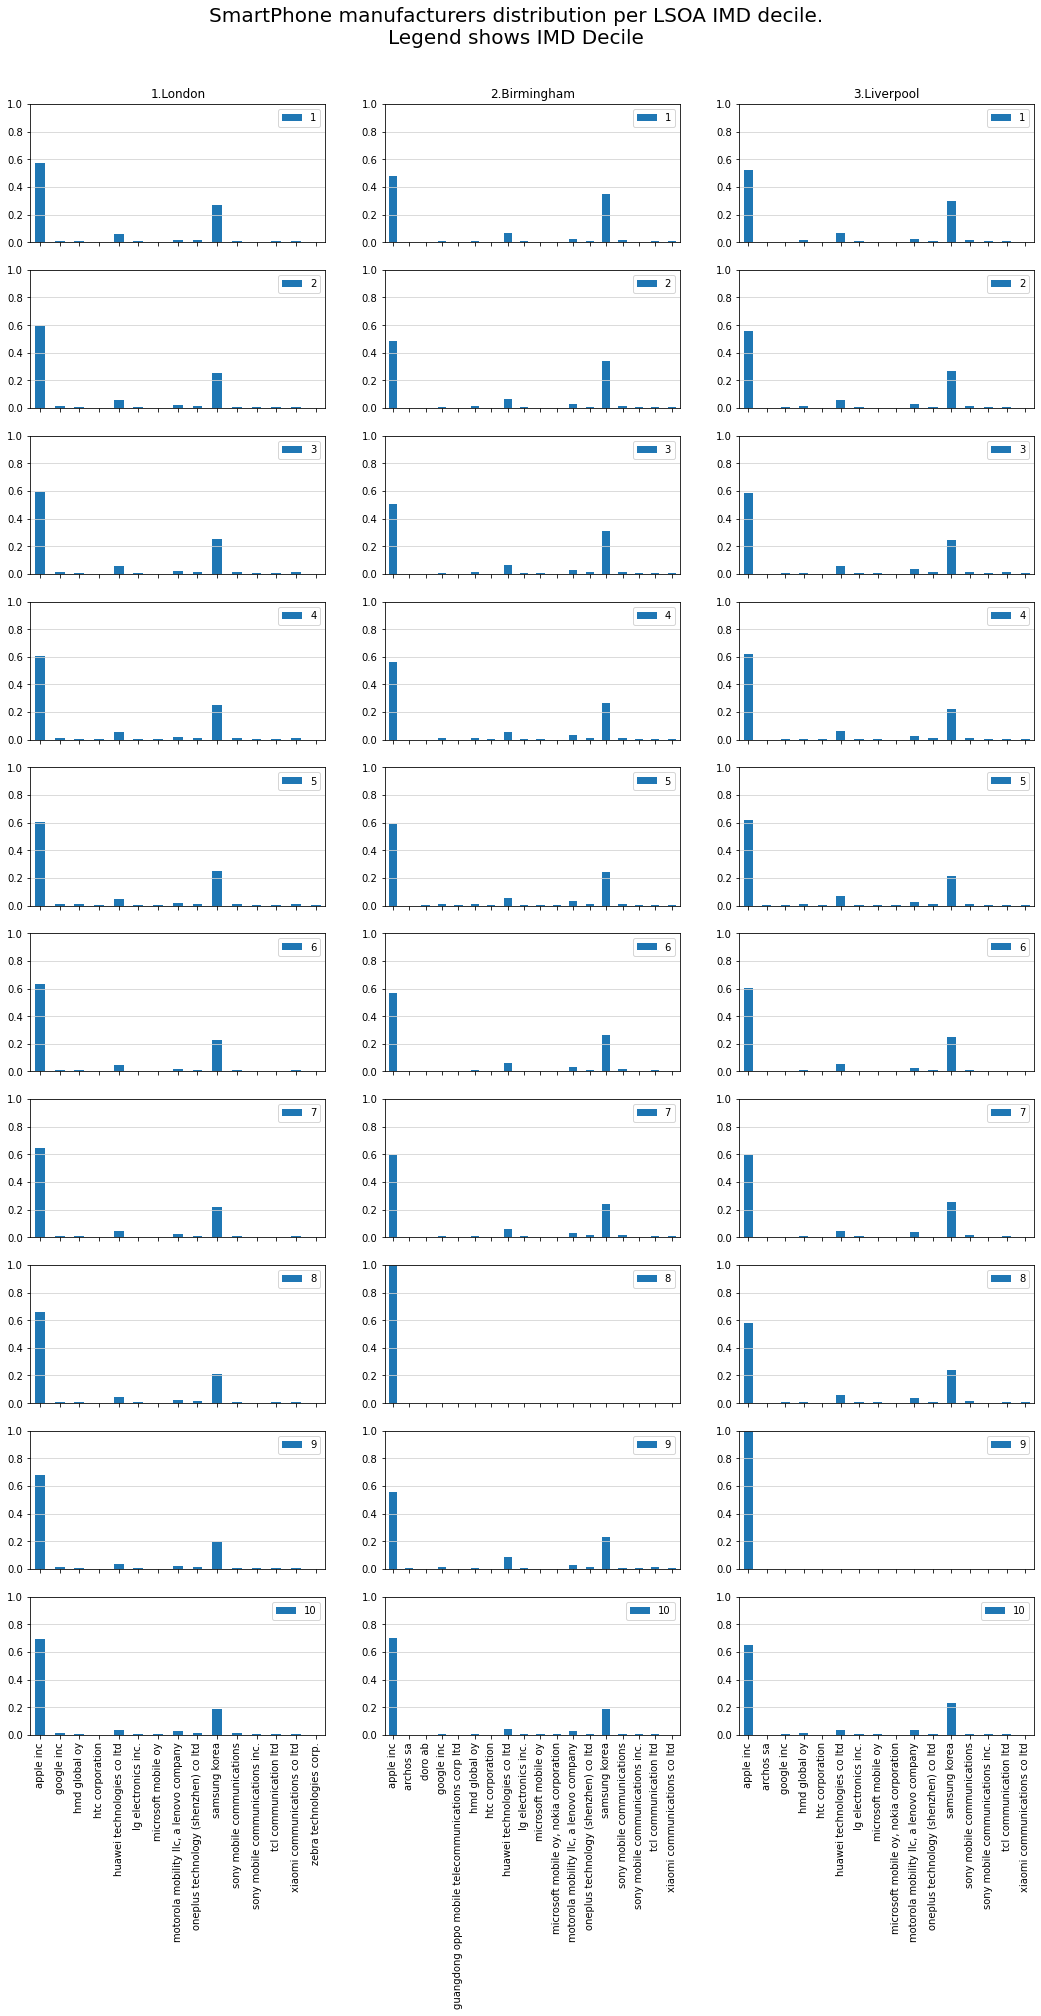

In [188]:
fig, ax = plt.subplots(10, 3, figsize=(18, 30), facecolor='w', edgecolor='k')
fig.suptitle('SmartPhone manufacturers distribution per LSOA IMD decile.\nLegend shows IMD Decile', size=20,y=.925)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,1])
    ax.set_xlabel('')
    ax.set_ylabel('')

ax[0,0].set_title('1.London')
ax[0,1].set_title('2.Birmingham')
ax[0,2].set_title('3.Liverpool');

for i in range(10):
    london.iloc[:,i].plot.bar(ax = ax[i,0],legend=True)
    birmingham.iloc[:,i].plot.bar(ax = ax[i,1],legend=True)
    liverpool.iloc[:,i].plot.bar(ax = ax[i,2],legend=True)
    applyPlotStyle(ax[i,0])
    applyPlotStyle(ax[i,1])
    applyPlotStyle(ax[i,2])
    if i!=9:
        ax[i,0].set_xticklabels('')
        ax[i,1].set_xticklabels('')
        ax[i,2].set_xticklabels('')

### 2.2.1.3. Manufacturers UserPerf Metrics across all LSOA IMDs

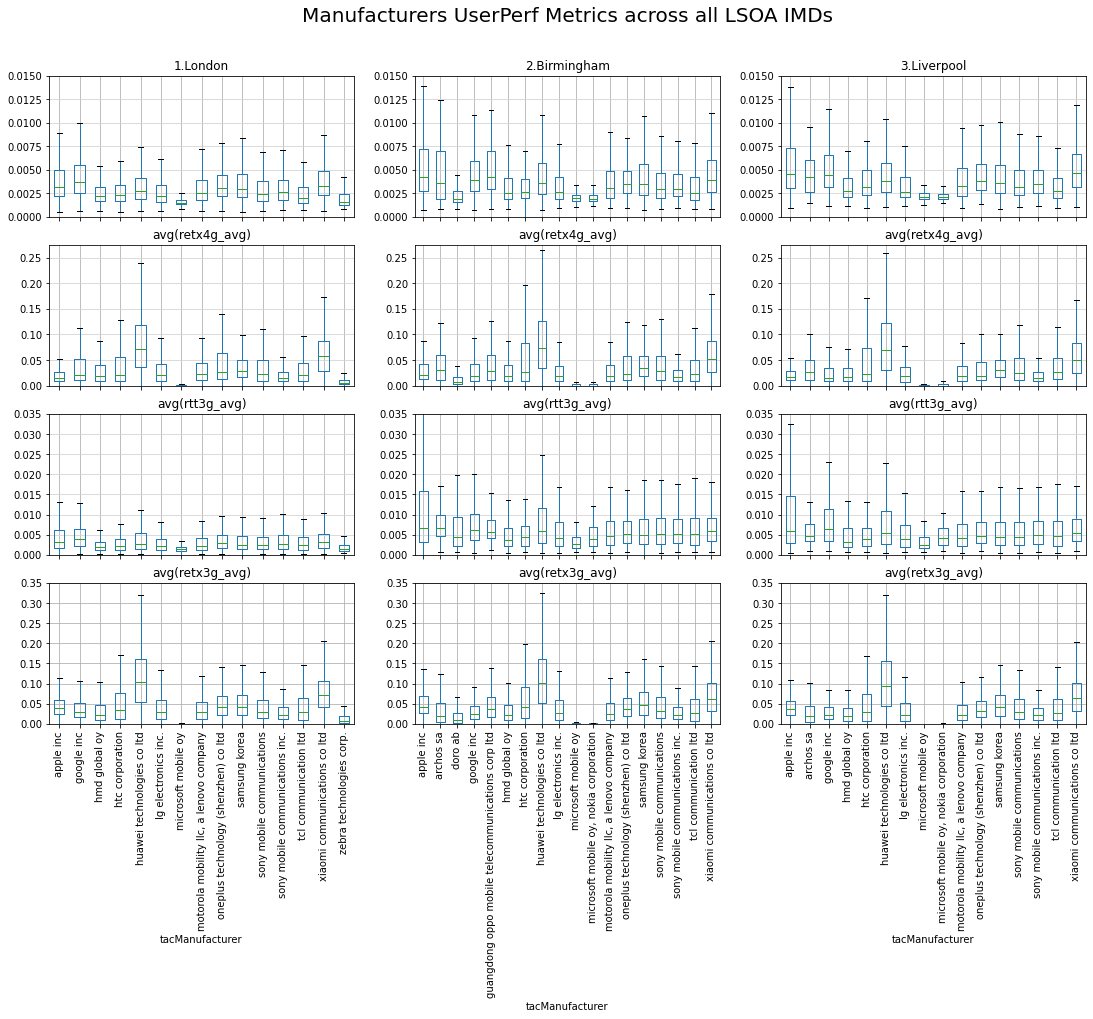

In [212]:
fig, ax = plt.subplots(4, 3, figsize=(18, 12), facecolor='w', edgecolor='k')

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_xlabel('')
    ax.set_xticklabels('')

metrics_list = ['avg(rtt4g_avg)','avg(retx4g_avg)','avg(rtt3g_avg)', 'avg(retx3g_avg)']
for column in metrics_list:
    london_userperf_pd[column] = london_userperf_pd[column]/london_userperf_pd[column].max()
    birmingham_userperf_pd[column] = birmingham_userperf_pd[column]/birmingham_userperf_pd[column].max()
    liverpool_userperf_pd[column] = liverpool_userperf_pd[column]/liverpool_userperf_pd[column].max()
    
for i in range(len(metrics_list)):
    london_userperf_pd.boxplot(column=metrics_list[i], by='tacManufacturer', showfliers = False, ax = ax[i,0], rot=90)
    birmingham_userperf_pd.boxplot(column=metrics_list[i], by='tacManufacturer', showfliers = False, ax = ax[i,1], rot=90)
    liverpool_userperf_pd.boxplot(column=metrics_list[i], by='tacManufacturer', showfliers = False, ax = ax[i,2], rot=90)
    if i!=3:
        applyPlotStyle(ax[i,0])
        applyPlotStyle(ax[i,1])
        applyPlotStyle(ax[i,2])
    if i==0:
        ax[i,0].set_ylim([0,0.015])
        ax[i,1].set_ylim([0,0.015])
        ax[i,2].set_ylim([0,0.015])
    if i==1:
        ax[i,0].set_ylim([0,0.275])
        ax[i,1].set_ylim([0,0.275])
        ax[i,2].set_ylim([0,0.275])            
    if i==2:
        ax[i,0].set_ylim([0,0.035])
        ax[i,1].set_ylim([0,0.035])
        ax[i,2].set_ylim([0,0.035])
    if i==3:
        ax[i,0].set_ylim([0,0.35])
        ax[i,1].set_ylim([0,0.35])
        ax[i,2].set_ylim([0,0.35])
        
fig.suptitle('Manufacturers UserPerf Metrics across all LSOA IMDs', size=20)
ax[0,0].set_title('1.London')
ax[0,1].set_title('2.Birmingham')
ax[0,2].set_title('3.Liverpool');

#### 2.2.1.4. TOP 3 Manufacturers UserPerf per LSOA IMD

In [11]:
london_devices_mnfs = london_devices_pd[(london_devices_pd['tacDeviceType'] == 'smartphone') & \
                                        (london_devices_pd['tacManufacturer'].isin(['apple inc', 'samsung korea', 'huawei technologies co ltd']))][['device_id','tacManufacturer','tacModelName','IMDDecil']].copy()
birmingham_devices_mnfs = birmingham_devices_pd[(birmingham_devices_pd['tacDeviceType'] == 'smartphone') & \
                                        (birmingham_devices_pd['tacManufacturer'].isin(['apple inc', 'samsung korea', 'huawei technologies co ltd']))][['device_id','tacManufacturer','tacModelName','IMDDecil']].copy()
liverpool_devices_mnfs = liverpool_devices_pd[(liverpool_devices_pd['tacDeviceType'] == 'smartphone') & \
                                        (liverpool_devices_pd['tacManufacturer'].isin(['apple inc', 'samsung korea', 'huawei technologies co ltd']))][['device_id','tacManufacturer','tacModelName','IMDDecil']].copy()
london_userperf_pd = pd.merge(london_userperf_pd, london_devices_mnfs, on='device_id', how='inner')
birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_devices_mnfs, on='device_id', how='inner')
liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_devices_mnfs, on='device_id', how='inner')

In [15]:
metrics_list = ['avg(rtt4g_avg)','avg(retx4g_avg)','avg(rtt3g_avg)', 'avg(retx3g_avg)']
for column in metrics_list:
    london_userperf_pd[column] = london_userperf_pd[column]/london_userperf_pd[column].max()
    birmingham_userperf_pd[column] = birmingham_userperf_pd[column]/birmingham_userperf_pd[column].max()
    liverpool_userperf_pd[column] = liverpool_userperf_pd[column]/liverpool_userperf_pd[column].max()

In [19]:
london_userperf_pd['IMDDecil'] = london_userperf_pd['IMDDecil'].astype(int)
birmingham_userperf_pd['IMDDecil'] = birmingham_userperf_pd['IMDDecil'].astype(int)
liverpool_userperf_pd['IMDDecil'] = liverpool_userperf_pd['IMDDecil'].astype(int)

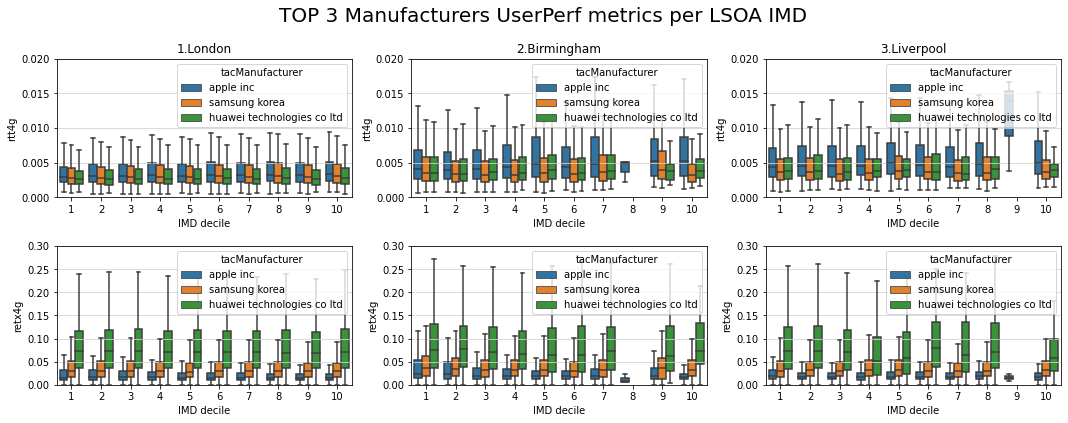

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), facecolor='w', edgecolor='k')
fig.suptitle('TOP 3 Manufacturers UserPerf metrics per LSOA IMD', size=20, y=1.)
def applyPlotStyle(ax, ylabel, ylim):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    #ax.set_ylim([0,4])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim)

#london = sns.violinplot(ax = ax[0], x='IMDDecil', y='area_size', hue='area_type',scale='area', data=london_areas, split=True, showfliers=False)
sns.boxplot(ax = ax[0,0], x='IMDDecil', y='avg(rtt4g_avg)', hue='tacManufacturer', data=london_userperf_pd, showfliers=False, hue_order = ['apple inc', 'samsung korea', 'huawei technologies co ltd'])
sns.boxplot(ax = ax[1,0], x='IMDDecil', y='avg(retx4g_avg)', hue='tacManufacturer', data=london_userperf_pd, showfliers=False, hue_order = ['apple inc', 'samsung korea', 'huawei technologies co ltd'])
applyPlotStyle(ax[0,0],'rtt4g',[0,0.02])
applyPlotStyle(ax[1,0],'retx4g',[0,0.30])
ax[0,0].set_title('1.London')

#birmingham = sns.violinplot(ax=ax[1], x='IMDDecil', y='area_size', hue='area_type',scale='area', data=birmingham_areas, split=True, showfliers=False)
sns.boxplot(ax=ax[0,1], x='IMDDecil', y='avg(rtt4g_avg)', hue='tacManufacturer', data=birmingham_userperf_pd, showfliers=False, hue_order = ['apple inc', 'samsung korea', 'huawei technologies co ltd'])
sns.boxplot(ax=ax[1,1], x='IMDDecil', y='avg(retx4g_avg)', hue='tacManufacturer', data=birmingham_userperf_pd, showfliers=False, hue_order = ['apple inc', 'samsung korea', 'huawei technologies co ltd'])
applyPlotStyle(ax[0,1],'rtt4g',[0,0.02])
applyPlotStyle(ax[1,1],'retx4g',[0,.3])
ax[0,1].set_title('2.Birmingham')

#liverpool = sns.violinplot(ax=ax[2], x='IMDDecil', y='area_size', hue='area_type',scale='area', data=birmingham_areas, split=True, showfliers=False)
sns.boxplot(ax=ax[0,2], x='IMDDecil', y='avg(rtt4g_avg)', hue='tacManufacturer', data=liverpool_userperf_pd, showfliers=False, hue_order = ['apple inc', 'samsung korea', 'huawei technologies co ltd'])
sns.boxplot(ax=ax[1,2], x='IMDDecil', y='avg(retx4g_avg)', hue='tacManufacturer', data=liverpool_userperf_pd, showfliers=False, hue_order = ['apple inc', 'samsung korea', 'huawei technologies co ltd'])
applyPlotStyle(ax[0,2],'rtt4g',[0,0.02])
applyPlotStyle(ax[1,2],'retx4g',[0,0.3])
ax[0,2].set_title('3.Liverpool')

fig.subplots_adjust(hspace=0.35);

### 2.2.2. ModelNames of TOP Manufacturers

#### 2.2.2.1. ModelNames distributions of TOP Manufacturers per LSOA IMD decile (Apple, Samsung)

In [16]:
london_apple_counts = london_userperf_pd[london_userperf_pd['tacManufacturer']=='apple inc']['tacModelName'].value_counts(normalize = True)
london_apple_ordered = [london_apple_counts[0]]
for i in range(1,len(london_apple_counts)):
    london_apple_ordered.append(london_apple_counts[i] + london_apple_ordered[i-1])
    
birmingham_apple_counts = birmingham_userperf_pd[birmingham_userperf_pd['tacManufacturer']=='apple inc']['tacModelName'].value_counts(normalize = True)
birmingham_apple_ordered = [birmingham_apple_counts[0]]
for i in range(1,len(birmingham_apple_counts)):
    birmingham_apple_ordered.append(birmingham_apple_counts[i] + birmingham_apple_ordered[i-1])
    
liverpool_apple_counts = liverpool_userperf_pd[liverpool_userperf_pd['tacManufacturer']=='apple inc']['tacModelName'].value_counts(normalize = True)
liverpool_apple_ordered = [liverpool_apple_counts[0]]
for i in range(1,len(liverpool_apple_counts)):
    liverpool_apple_ordered.append(liverpool_apple_counts[i] + liverpool_apple_ordered[i-1])
    
london_samsung_counts = london_userperf_pd[london_userperf_pd['tacManufacturer']=='samsung korea']['tacModelName'].value_counts(normalize = True)
london_samsung_ordered = [london_samsung_counts[0]]
for i in range(1,len(london_samsung_counts)):
    london_samsung_ordered.append(london_samsung_counts[i] + london_samsung_ordered[i-1])
    
birmingham_samsung_counts = birmingham_userperf_pd[birmingham_userperf_pd['tacManufacturer']=='samsung korea']['tacModelName'].value_counts(normalize = True)
birmingham_samsung_ordered = [birmingham_samsung_counts[0]]
for i in range(1,len(birmingham_samsung_counts)):
    birmingham_samsung_ordered.append(birmingham_samsung_counts[i] + birmingham_samsung_ordered[i-1])
    
liverpool_samsung_counts = liverpool_userperf_pd[liverpool_userperf_pd['tacManufacturer']=='samsung korea']['tacModelName'].value_counts(normalize = True)
liverpool_samsung_ordered = [liverpool_samsung_counts[0]]
for i in range(1,len(liverpool_samsung_counts)):
    liverpool_samsung_ordered.append(liverpool_samsung_counts[i] + liverpool_samsung_ordered[i-1])

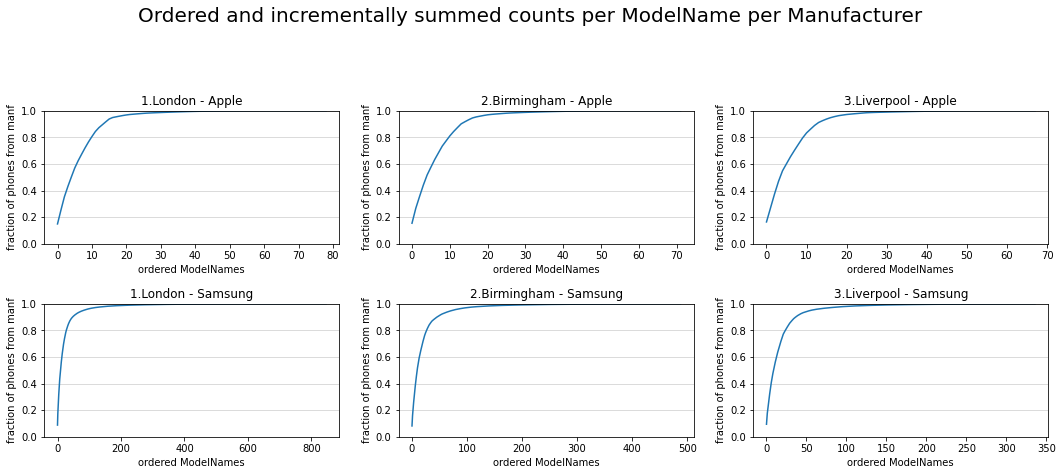

In [61]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), facecolor='w', edgecolor='k')
fig.suptitle('Ordered and incrementally summed counts per ModelName per Manufacturer', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,1])
    #ax.set_xlim([0,50])
    ax.set_xlabel('ordered ModelNames')
    ax.set_ylabel('fraction of phones from manf')
    
ax[0,0].plot(london_apple_ordered)
ax[1,0].plot(london_samsung_ordered)
applyPlotStyle(ax[0,0])
applyPlotStyle(ax[1,0])
ax[0,0].set_title('1.London - Apple')
ax[1,0].set_title('1.London - Samsung')

ax[0,1].plot(birmingham_apple_ordered)
ax[1,1].plot(birmingham_samsung_ordered)
applyPlotStyle(ax[0,1])
applyPlotStyle(ax[1,1])
ax[0,1].set_title('2.Birmingham - Apple')
ax[1,1].set_title('2.Birmingham - Samsung')

ax[0,2].plot(liverpool_apple_ordered)
ax[1,2].plot(liverpool_samsung_ordered)
applyPlotStyle(ax[0,2])
applyPlotStyle(ax[1,2])
ax[0,2].set_title('3.Liverpool - Apple')
ax[1,2].set_title('3.Liverpool - Samsung')

fig.subplots_adjust(hspace=0.45)

In [27]:
# filter ModelNames that cover 90% of devices from a given manufacturer
# apple
london_last_apple = np.where(np.array(london_apple_ordered) > 0.90)[0][0]
birmingham_last_apple = np.where(np.array(birmingham_apple_ordered) > 0.90)[0][0]
liverpool_last_apple = np.where(np.array(liverpool_apple_ordered) > 0.90)[0][0]
# samsung
london_last_samsung = np.where(np.array(london_samsung_ordered) > 0.90)[0][0]
birmingham_last_samsung = np.where(np.array(birmingham_samsung_ordered) > 0.90)[0][0]
liverpool_last_samsung = np.where(np.array(liverpool_samsung_ordered) > 0.90)[0][0]

# apple
london_p90_apple = london_apple_counts.index.values[:london_last_apple]
birmingham_p90_apple = birmingham_apple_counts.index.values[:birmingham_last_apple]
liverpool_p90_apple = liverpool_apple_counts.index.values[:liverpool_last_apple]
# samsung
london_p90_samsung = london_samsung_counts.index.values[:london_last_samsung]
birmingham_p90_samsung = birmingham_samsung_counts.index.values[:birmingham_last_samsung]
liverpool_p90_samsung = liverpool_samsung_counts.index.values[:liverpool_last_samsung]

In [28]:
# prepare the dataset for plotting
london_userperf_pd['IMDDecil'] = london_userperf_pd['IMDDecil'].astype(int)
birmingham_userperf_pd['IMDDecil'] = birmingham_userperf_pd['IMDDecil'].astype(int)
liverpool_userperf_pd['IMDDecil'] = liverpool_userperf_pd['IMDDecil'].astype(int)

london_userperf_apple = london_userperf_pd[london_userperf_pd['tacModelName'].isin(london_p90_apple)]
birmingham_userperf_apple = birmingham_userperf_pd[birmingham_userperf_pd['tacModelName'].isin(birmingham_p90_apple)]
liverpool_userperf_apple = liverpool_userperf_pd[liverpool_userperf_pd['tacModelName'].isin(liverpool_p90_apple)]

london_apple = london_userperf_apple.pivot_table(index='tacModelName', columns='IMDDecil', aggfunc='size', fill_value=0)
london_apple = london_apple/london_apple.sum()
birmingham_apple = birmingham_userperf_apple.pivot_table(index='tacModelName', columns='IMDDecil', aggfunc='size', fill_value=0)
birmingham_apple = birmingham_apple/birmingham_apple.sum()
liverpool_apple = liverpool_userperf_apple.pivot_table(index='tacModelName', columns='IMDDecil', aggfunc='size', fill_value=0)
liverpool_apple = liverpool_apple/liverpool_apple.sum()

london_userperf_samsung = london_userperf_pd[london_userperf_pd['tacModelName'].isin(london_p90_samsung)]
birmingham_userperf_samsung = birmingham_userperf_pd[birmingham_userperf_pd['tacModelName'].isin(birmingham_p90_samsung)]
liverpool_userperf_samsung = liverpool_userperf_pd[liverpool_userperf_pd['tacModelName'].isin(liverpool_p90_samsung)]

london_samsung = london_userperf_samsung.pivot_table(index='tacModelName', columns='IMDDecil', aggfunc='size', fill_value=0)
london_samsung = london_samsung/london_samsung.sum()
birmingham_samsung = birmingham_userperf_samsung.pivot_table(index='tacModelName', columns='IMDDecil', aggfunc='size', fill_value=0)
birmingham_samsung = birmingham_samsung/birmingham_samsung.sum()
liverpool_samsung = liverpool_userperf_samsung.pivot_table(index='tacModelName', columns='IMDDecil', aggfunc='size', fill_value=0)
liverpool_samsung = liverpool_samsung/liverpool_samsung.sum()

#### 2.2.2.2 Apple ModelName distribution per LSOA IMD

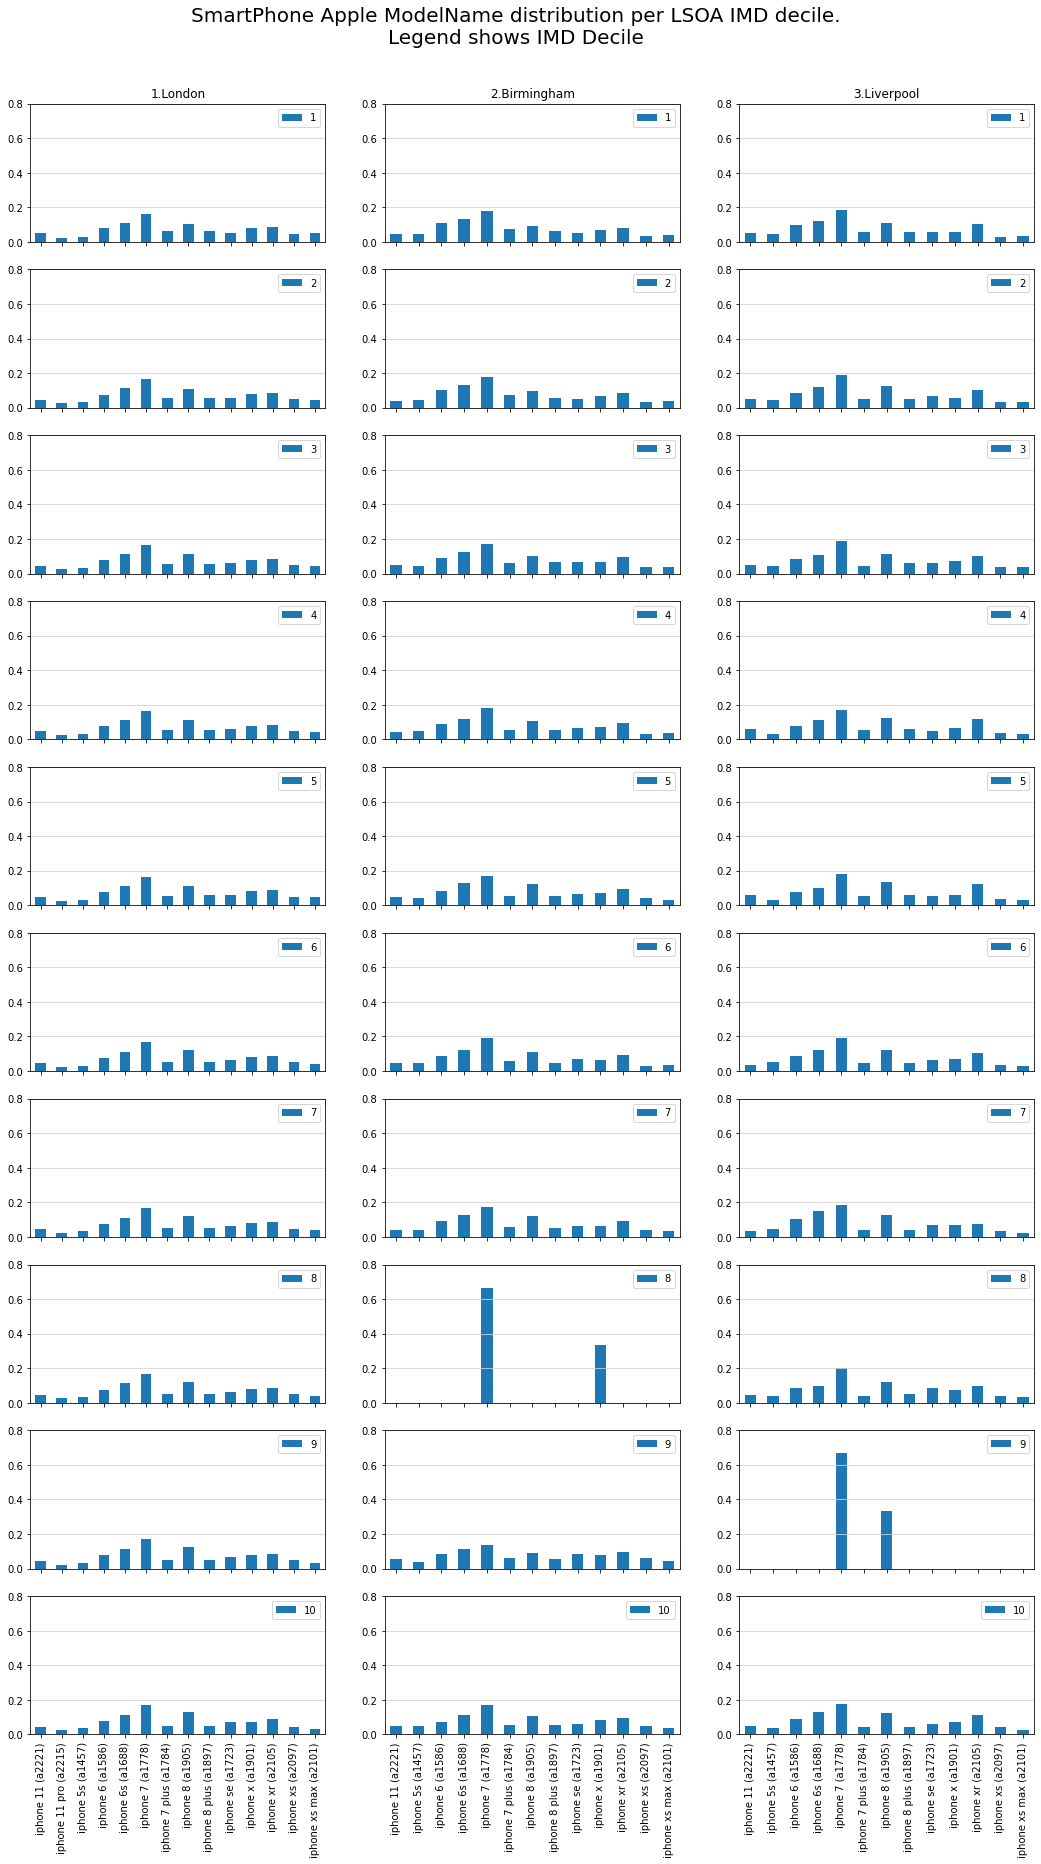

In [56]:
fig, ax = plt.subplots(10, 3, figsize=(18, 30), facecolor='w', edgecolor='k')
fig.suptitle('SmartPhone Apple ModelName distribution per LSOA IMD decile.\nLegend shows IMD Decile', size=20,y=.925)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.8])
    ax.set_xlabel('')
    ax.set_ylabel('')

ax[0,0].set_title('1.London')
ax[0,1].set_title('2.Birmingham')
ax[0,2].set_title('3.Liverpool');

for i in range(10):
    london_apple.iloc[:,i].plot.bar(ax = ax[i,0],legend=True)
    birmingham_apple.iloc[:,i].plot.bar(ax = ax[i,1],legend=True)
    liverpool_apple.iloc[:,i].plot.bar(ax = ax[i,2],legend=True)
    applyPlotStyle(ax[i,0])
    applyPlotStyle(ax[i,1])
    applyPlotStyle(ax[i,2])
    if i!=9:
        ax[i,0].set_xticklabels('')
        ax[i,1].set_xticklabels('')
        ax[i,2].set_xticklabels('')

#### 2.2.2.3 Samsung ModelName distribution per LSOA IMD

In [43]:
# there are not samsung devices in LSOA IMD decile 8 in Birmingham a and 9 in Liverpool
birmingham_samsung.insert(7,'8',0)
liverpool_samsung.insert(8,'9',0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

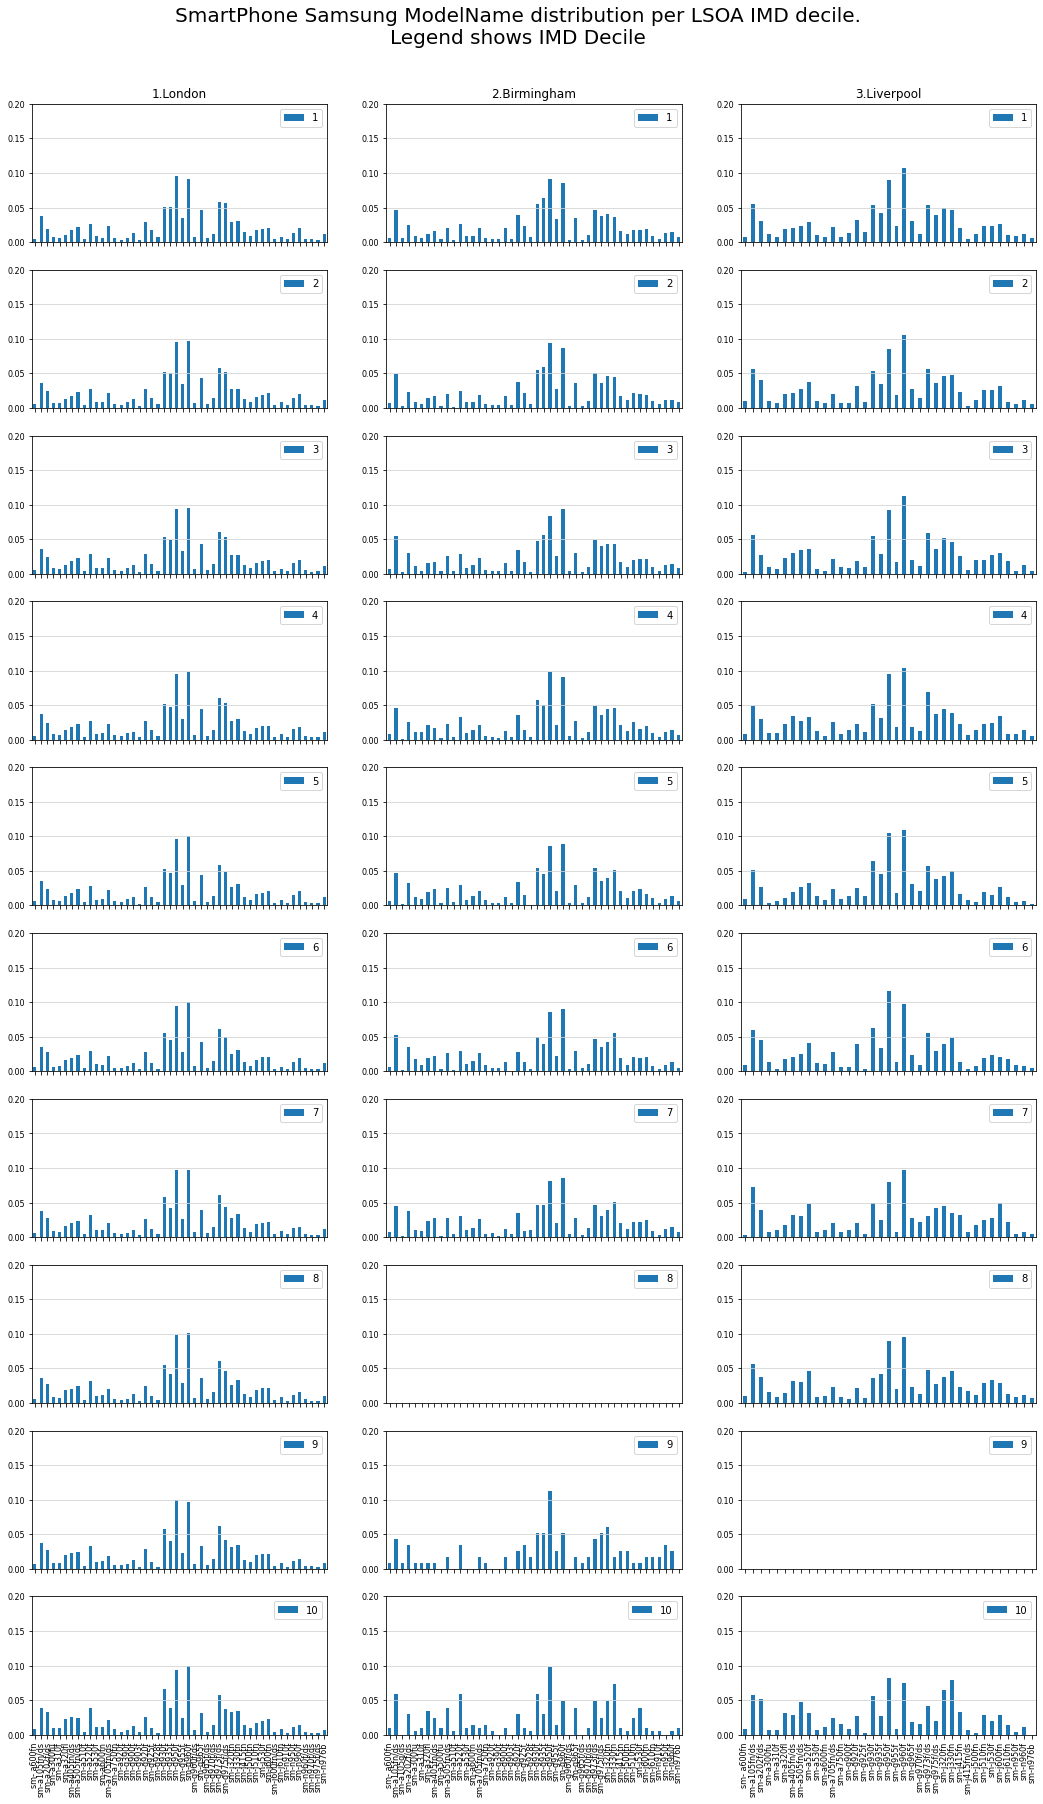

In [55]:
fig, ax = plt.subplots(10, 3, figsize=(18, 30), facecolor='w', edgecolor='k')
fig.suptitle('SmartPhone Samsung ModelName distribution per LSOA IMD decile.\nLegend shows IMD Decile', size=20,y=.925)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.2])
    ax.set_xlabel('')
    ax.set_ylabel('')

ax[0,0].set_title('1.London')
ax[0,1].set_title('2.Birmingham')
ax[0,2].set_title('3.Liverpool');

for i in range(10):
    london_samsung.iloc[:,i].plot.bar(ax = ax[i,0],legend=True,fontsize=8)
    birmingham_samsung.iloc[:,i].plot.bar(ax = ax[i,1],legend=True,fontsize=8)
    liverpool_samsung.iloc[:,i].plot.bar(ax = ax[i,2],legend=True,fontsize=8)
    applyPlotStyle(ax[i,0])
    applyPlotStyle(ax[i,1])
    applyPlotStyle(ax[i,2])
    if i!=9:
        ax[i,0].set_xticklabels('')
        ax[i,1].set_xticklabels('')
        ax[i,2].set_xticklabels('')

#### 2.2.2.4. Apple DeviceType UserPerf Metrics across all LSOA IMDs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

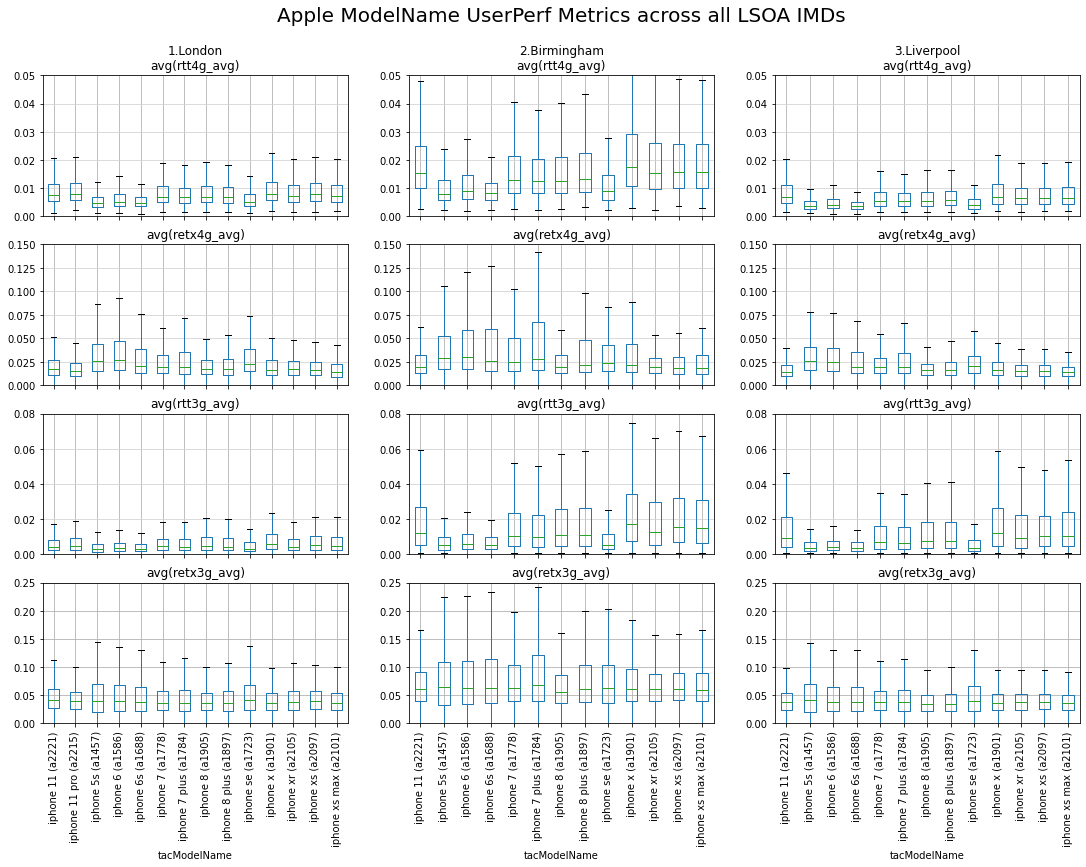

In [63]:
fig, ax = plt.subplots(4, 3, figsize=(18, 12), facecolor='w', edgecolor='k')

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_xlabel('')
    ax.set_xticklabels('')

metrics_list = ['avg(rtt4g_avg)','avg(retx4g_avg)','avg(rtt3g_avg)', 'avg(retx3g_avg)']
for column in metrics_list:
    london_userperf_apple[column] = london_userperf_apple[column]/london_userperf_apple[column].max()
    birmingham_userperf_apple[column] = birmingham_userperf_apple[column]/birmingham_userperf_apple[column].max()
    liverpool_userperf_apple[column] = liverpool_userperf_apple[column]/liverpool_userperf_apple[column].max()
    
for i in range(len(metrics_list)):
    london_userperf_apple.boxplot(column=metrics_list[i], by='tacModelName', showfliers = False, ax = ax[i,0], rot=90)
    birmingham_userperf_apple.boxplot(column=metrics_list[i], by='tacModelName', showfliers = False, ax = ax[i,1], rot=90)
    liverpool_userperf_apple.boxplot(column=metrics_list[i], by='tacModelName', showfliers = False, ax = ax[i,2], rot=90)
    if i!=3:
        applyPlotStyle(ax[i,0])
        applyPlotStyle(ax[i,1])
        applyPlotStyle(ax[i,2])
    if i==0:
        ax[i,0].set_ylim([0,0.05])
        ax[i,1].set_ylim([0,0.05])
        ax[i,2].set_ylim([0,0.05])
    if i==1:
        ax[i,0].set_ylim([0,0.15])
        ax[i,1].set_ylim([0,0.15])
        ax[i,2].set_ylim([0,0.15])            
    if i==2:
        ax[i,0].set_ylim([0,0.08])
        ax[i,1].set_ylim([0,0.08])
        ax[i,2].set_ylim([0,0.08])
    if i==3:
        ax[i,0].set_ylim([0,0.25])
        ax[i,1].set_ylim([0,0.25])
        ax[i,2].set_ylim([0,0.25])
fig.suptitle('Apple ModelName UserPerf Metrics across all LSOA IMDs', size=20)
ax[0,0].set_title('1.London\navg(rtt4g_avg)')
ax[0,1].set_title('2.Birmingham\navg(rtt4g_avg)')
ax[0,2].set_title('3.Liverpool\navg(rtt4g_avg)');

#### 2.2.2.5. Samsung DeviceType Metrics across all LSOA IMDs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

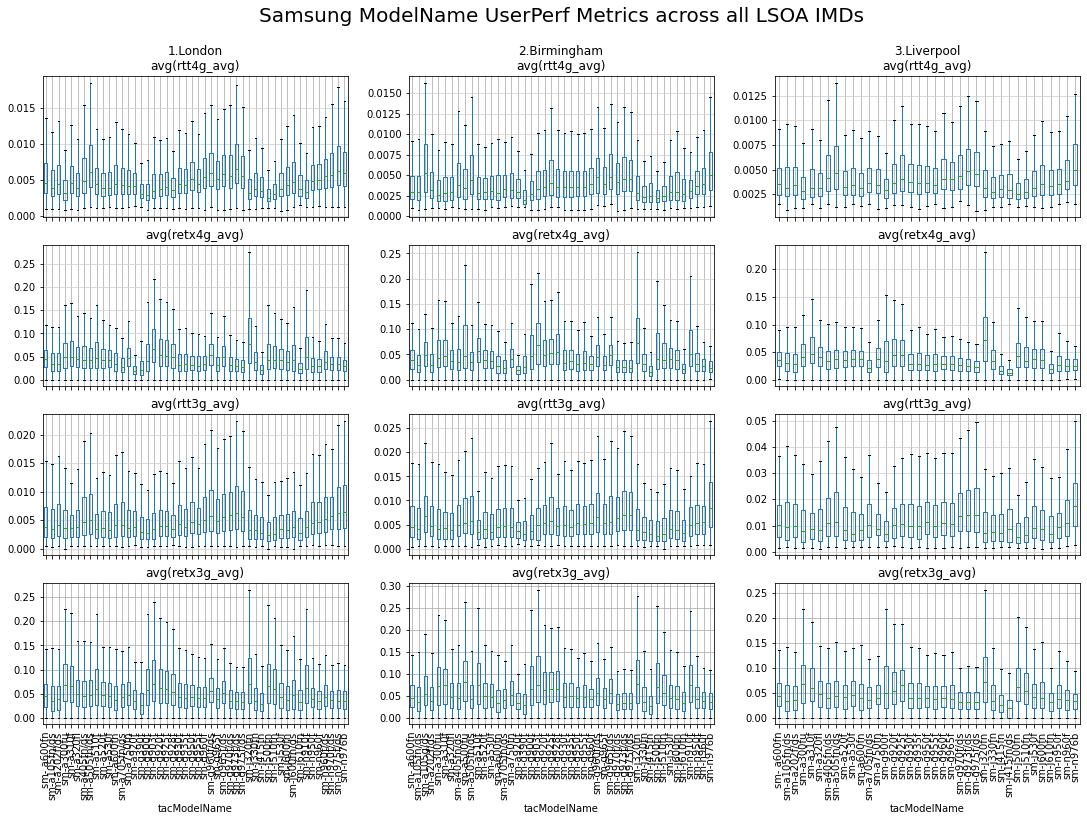

In [64]:
fig, ax = plt.subplots(4, 3, figsize=(18, 12), facecolor='w', edgecolor='k')

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_xlabel('')
    ax.set_xticklabels('')

metrics_list = ['avg(rtt4g_avg)','avg(retx4g_avg)','avg(rtt3g_avg)', 'avg(retx3g_avg)']
for column in metrics_list:
    london_userperf_samsung[column] = london_userperf_samsung[column]/london_userperf_samsung[column].max()
    birmingham_userperf_samsung[column] = birmingham_userperf_samsung[column]/birmingham_userperf_samsung[column].max()
    liverpool_userperf_samsung[column] = liverpool_userperf_samsung[column]/liverpool_userperf_samsung[column].max()
    
for i in range(len(metrics_list)):
    london_userperf_samsung.boxplot(column=metrics_list[i], by='tacModelName', showfliers = False, ax = ax[i,0], rot=90)
    birmingham_userperf_samsung.boxplot(column=metrics_list[i], by='tacModelName', showfliers = False, ax = ax[i,1], rot=90)
    liverpool_userperf_samsung.boxplot(column=metrics_list[i], by='tacModelName', showfliers = False, ax = ax[i,2], rot=90)
    if i!=3:
        applyPlotStyle(ax[i,0])
        applyPlotStyle(ax[i,1])
        applyPlotStyle(ax[i,2])
    '''
    if i==0:
        ax[i,0].set_ylim([0,0.05])
        ax[i,1].set_ylim([0,0.05])
        ax[i,2].set_ylim([0,0.05])
    if i==1:
        ax[i,0].set_ylim([0,0.15])
        ax[i,1].set_ylim([0,0.15])
        ax[i,2].set_ylim([0,0.15])            
    if i==2:
        ax[i,0].set_ylim([0,0.08])
        ax[i,1].set_ylim([0,0.08])
        ax[i,2].set_ylim([0,0.08])
    if i==3:
        ax[i,0].set_ylim([0,0.25])
        ax[i,1].set_ylim([0,0.25])
        ax[i,2].set_ylim([0,0.25])
    '''
fig.suptitle('Samsung ModelName UserPerf Metrics across all LSOA IMDs', size=20)
ax[0,0].set_title('1.London\navg(rtt4g_avg)')
ax[0,1].set_title('2.Birmingham\navg(rtt4g_avg)')
ax[0,2].set_title('3.Liverpool\navg(rtt4g_avg)');

# 3. Filter Smartphone devices for UK_Diagrams_IMC2020.ipynb

In [209]:
london_homeantenna_loc = 'datasets/012020/home_ldn.csv'
birmingham_homeantenna_loc = 'datasets/012020/home_birm.csv'
liverpool_homeantenna_loc = 'datasets/012020/home_lpool.csv'

london_userperf_loc = 'datasets/012020/userperf_ldn_2020_jan.csv'
birmingham_userperf_loc = 'datasets/012020/userperf_birm_2020_jan.csv'
liverpool_userperf_loc = 'datasets/012020/userperf_lpool_2020_jan.csv'

In [210]:
london_homeantenna_pd = pd.read_csv(london_homeantenna_loc, index_col=False)
birmingham_homeantenna_pd = pd.read_csv(birmingham_homeantenna_loc, index_col=False)
liverpool_homeantenna_pd = pd.read_csv(liverpool_homeantenna_loc, index_col=False)

london_userperf_pd = pd.read_csv(london_userperf_loc, index_col=False)
birmingham_userperf_pd = pd.read_csv(birmingham_userperf_loc, index_col=False)
liverpool_userperf_pd = pd.read_csv(liverpool_userperf_loc, index_col=False)

In [211]:
# define data we will add to existing datasets(to make it easier to understand in merge) - for simplicity only filter data, do not add any additional information
london_devices_pd_2merge = london_devices_pd[london_devices_pd.tacDeviceType=='smartphone'][['device_id']]
birmingham_devices_pd_2merge = birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='smartphone'][['device_id']]
liverpool_devices_pd_2merge = liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='smartphone'][['device_id']] 

In [212]:
london_homeantenna_pd = pd.merge(london_homeantenna_pd, london_devices_pd_2merge, on='device_id', how='inner')
birmingham_homeantenna_pd = pd.merge(birmingham_homeantenna_pd, birmingham_devices_pd_2merge, on='device_id', how='inner')
liverpool_homeantenna_pd = pd.merge(liverpool_homeantenna_pd, liverpool_devices_pd_2merge, on='device_id', how='inner')

london_userperf_pd = pd.merge(london_userperf_pd, london_devices_pd_2merge, on='device_id', how='inner')
birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_devices_pd_2merge, on='device_id', how='inner')
liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_devices_pd_2merge, on='device_id', how='inner')

In [215]:
# [:-4] - until .csv in the string
london_homeantenna_pd.to_csv(london_homeantenna_loc[:-4] + '_onlysmartphones.csv', index=False)
birmingham_homeantenna_pd.to_csv(birmingham_homeantenna_loc[:-4] + '_onlysmartphones.csv', index=False)
liverpool_homeantenna_pd.to_csv(liverpool_homeantenna_loc[:-4] + '_onlysmartphones.csv', index=False)

london_userperf_pd.to_csv(london_userperf_loc[:-4] + '_onlysmartphones.csv', index=False)
birmingham_userperf_pd.to_csv(birmingham_userperf_loc[:-4] + '_onlysmartphones.csv', index=False)
liverpool_userperf_pd.to_csv(liverpool_userperf_loc[:-4] + '_onlysmartphones.csv', index=False)